In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import imageio as img
import math
import time
import string
%matplotlib inline
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" #for training on gpu

In [15]:
# setting variables for the directory to the data
todata = "/home/abdullah/Desktop/Abdullah/LUMS/Senior/Sproj/ImgPreProcessing/Channel/"
val = list(string.ascii_uppercase)

# data input (img shape: 28*28)
n_input = 28

# total classes (0-9 digits)
n_classes = 26

norm = 255.0

In [9]:
# saving current directory
cur = os.getcwd()

# changing directoy to data set
os.chdir(todata)
# getting all the folder names
nmes = os.listdir(".")
nmes.sort()

# reading all the data into labels and data numpy arrays
labels = []
data = []
for letr in nmes:
    for file in os.listdir(todata+letr):
        labels.append(letr)
        f = img.imread(todata + letr + "/"+ file)
        data.append(f)
#         print(f.shape)
#         plt.imshow(f)
#         plt.show()
#         break
#     break
        # change back directory
os.chdir(cur)

print("\nData labales matrix")
labels = np.array(labels)
print(labels, labels.dtype, labels.shape)

# diving by 255 to get clamp values between zero and one
print("\nData matrix")
data = np.array(data, np.float32)/norm
print(data.dtype, data.shape)


Data labales matrix
['A' 'A' 'A' ... 'Z' 'Z' 'Z'] <U1 (3844,)

Data matrix
float32 (3844, 28, 28)


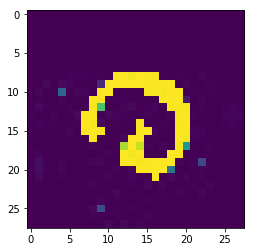

In [12]:
img = data[1000]
plt.imshow(img)
plt.show()

In [18]:
img.shape
img = img.reshape(-1, n_input, n_input, 1)
img.shape

(1, 28, 28, 1)

In [22]:
tf.reset_default_graph()

saver = tf.train.Saver()
save_path = "./Models/model196.ckpt"

# loading model
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, save_path)
    print("Model restored.")
    
#     feed_dict = {x: [img]}
#     classification = tf.run(y, feed_dict)
#     print(classification)

ValueError: No variables to save